# Importing Libraries & Image

In [ ]:
from PIL import Image
from google.colab import files
import cv2 as cv

uploaded = files.upload()

Saving R.jpg to R.jpg


In [ ]:
im = cv.imread('cat.jpg', 0)

# 1. Low pass filtering / mean / averaging filtering:

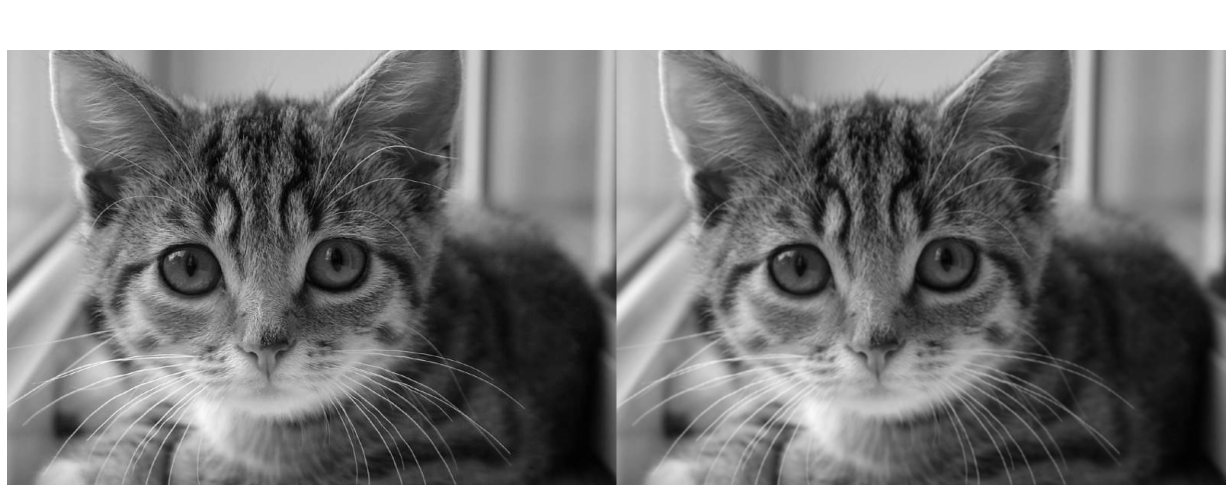

In [ ]:
## Using Built-in ##
import numpy as np
import matplotlib.pyplot as plt
kernel_size = (3, 3)
# opencv has implementation for kernel based box blurring
blur = cv.blur(im, kernel_size)

res = np.hstack([im, blur])
f=plt.figure(figsize=(25,8))
plt.title('Original Image vs Lowpass Filtered Image (Built-in)', fontsize=30, color='white', pad=20)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show(block=True)

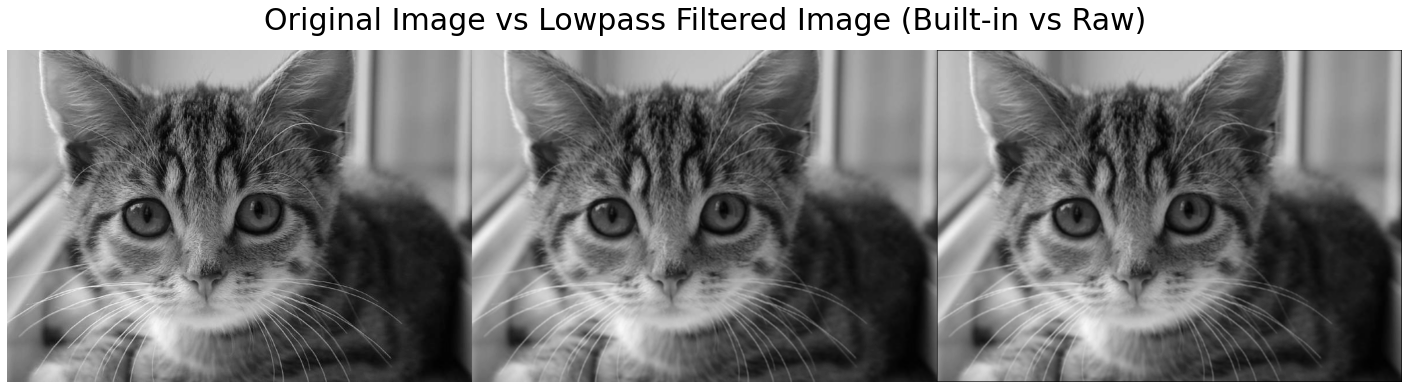

In [ ]:
## Raw Code ##
import numpy as np
from matplotlib import pyplot as plt
kernel_size = (3, 3)
# opencv has implementation for kernel based box blurring
blur = cv.blur(im, kernel_size)
m, n = im.shape

mask = np.ones([3, 3], dtype = int)
mask = mask / 9
  
# Convolve the 3X3 mask over the image
img_new = np.zeros([m, n])
 
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = im[i-1, j-1]*mask[0, 0]+im[i-1, j]*mask[0, 1]+im[i-1, j + 1]*mask[0, 2]+im[i, j-1]*mask[1, 0]+ im[i, j]*mask[1, 1]+im[i, j + 1]*mask[1, 2]+im[i + 1, j-1]*mask[2, 0]+im[i + 1, j]*mask[2, 1]+im[i + 1, j + 1]*mask[2, 2]
        img_new[i, j]= temp
         
img_new = img_new.astype(np.uint8)
res = np.hstack([im, blur, img_new])
f=plt.figure(figsize=(25,8))
plt.title('Original Image vs Lowpass Filtered Image (Built-in vs Raw)', fontsize=30, color='black', pad=20)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show(block=True)


# 2. Median Filtering or Nonlinear Filtering

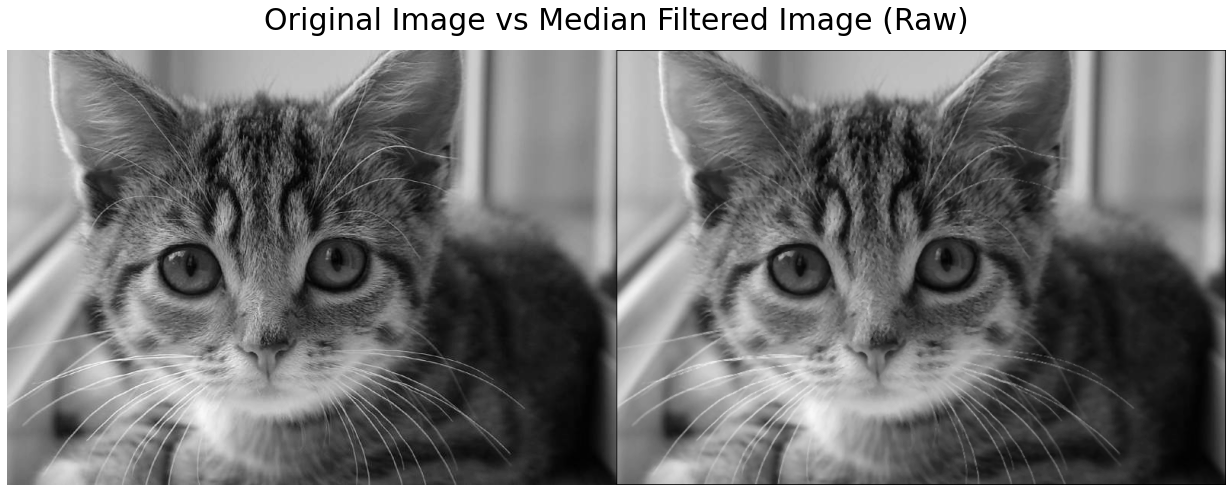

In [ ]:
img_noisy1 = im
m, n = img_noisy1.shape # Obtain the number of rows and columns of the image
# Traverse the image. For every 3X3 area, find the median of the pixels and replace the center pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = [img_noisy1[i-1, j-1],
			img_noisy1[i-1, j],
			img_noisy1[i-1, j + 1],
			img_noisy1[i, j-1],
			img_noisy1[i, j],
			img_noisy1[i, j + 1],
			img_noisy1[i + 1, j-1],
			img_noisy1[i + 1, j],
			img_noisy1[i + 1, j + 1]]
		
		temp = sorted(temp)
		img_new1[i, j]= temp[4]

img_new1 = img_new1.astype(np.uint8)
res = np.hstack([im, img_new1])
f=plt.figure(figsize=(25,8))
plt.title('Original Image vs Median Filtered Image (Raw)', fontsize=30, color='black', pad=20)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show(block=True)

# 3. Max Filtering

# Built-in

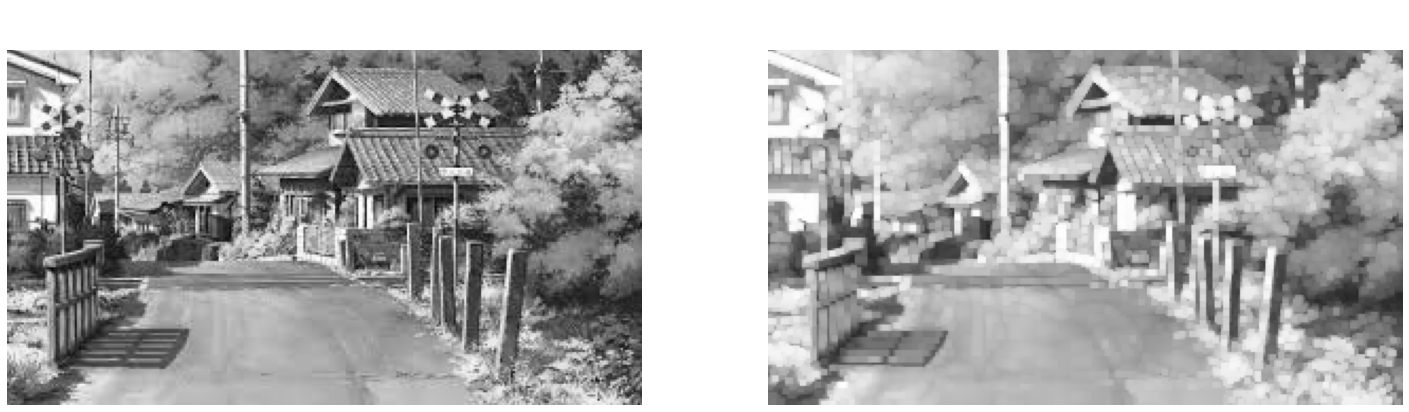

In [ ]:
# Importing Image and ImageFilter module from PIL package 
from PIL import Image, ImageFilter
   
# creating a image object
im1 = Image.open('s.jfif')
im1 = im1.convert('LA')
# applying the max filter
im2 = im1.filter(ImageFilter.MaxFilter(size = 3))
   
f=plt.figure(figsize=(25,8))
f.add_subplot(1,2,1)
plt.title('Original Image', fontsize=30, color='white', pad=20)
plt.imshow(im1,cmap='gray')
plt.axis('off')
f.add_subplot(1,2,2)
plt.title('Max Filtered Image', fontsize=30, color='white', pad=20)
plt.imshow(im2,cmap='gray')
plt.axis('off')
plt.show(block=True)

# Raw

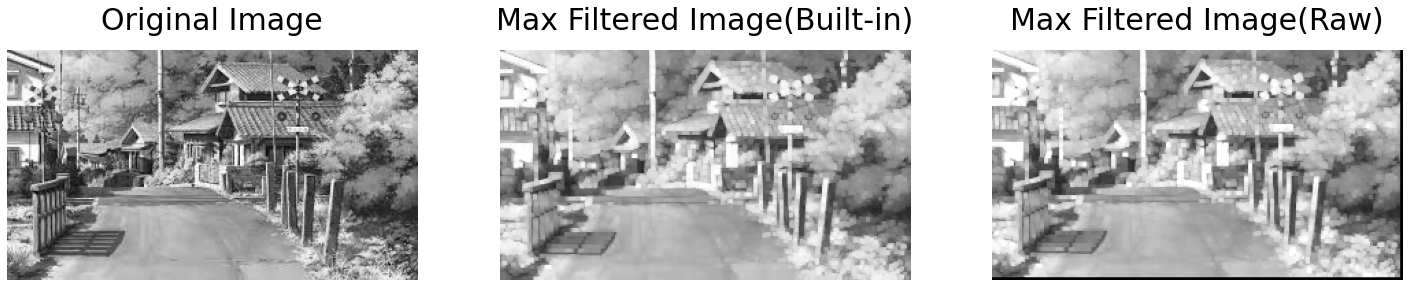

In [ ]:
image = cv.imread('s.jfif', 0)

kSize = 3    # Mask size
bSize = kSize // 2 
imageO = np.zeros(image.shape, dtype=np.uint8)
for x in range(image.shape[0] - kSize + 1):
    for y in range(image.shape[1] - kSize + 1):
        imageO[x, y] = np.amax(image[x:x+kSize, y:y+kSize])

f=plt.figure(figsize=(25,8))
f.add_subplot(1,3,1)
plt.title('Original Image', fontsize=30, color='black', pad=20)
plt.imshow(im1,cmap='gray')
plt.axis('off')
f.add_subplot(1,3,2)
plt.title('Max Filtered Image(Built-in)', fontsize=30, color='black', pad=20)
plt.imshow(im2,cmap='gray')
plt.axis('off')
f.add_subplot(1,3,3)
plt.title('Max Filtered Image(Raw)', fontsize=30, color='black', pad=20)
plt.imshow(imageO,cmap='gray')
plt.axis('off')
plt.show(block=True)

# 4. Minimum Filtering

# Built-in

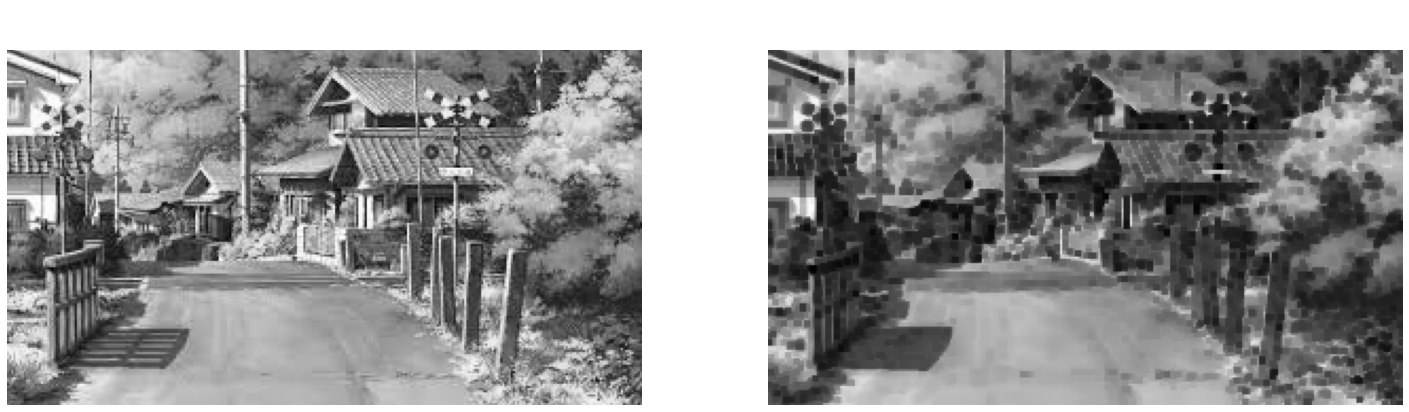

In [ ]:
# Importing Image and ImageFilter module from PIL package 
from PIL import Image, ImageFilter
   
# creating a image object
im1 = Image.open('s.jfif')
im1 = im1.convert('LA')
# applying the max filter
im2 = im1.filter(ImageFilter.MinFilter(size = 3))
   
f=plt.figure(figsize=(25,8))
f.add_subplot(1,2,1)
plt.title('Original Image', fontsize=30, color='white', pad=20)
plt.imshow(im1,cmap='gray')
plt.axis('off')
f.add_subplot(1,2,2)
plt.title('Min Filtered Image', fontsize=30, color='white', pad=20)
plt.imshow(im2,cmap='gray')
plt.axis('off')
plt.show(block=True)

# Raw

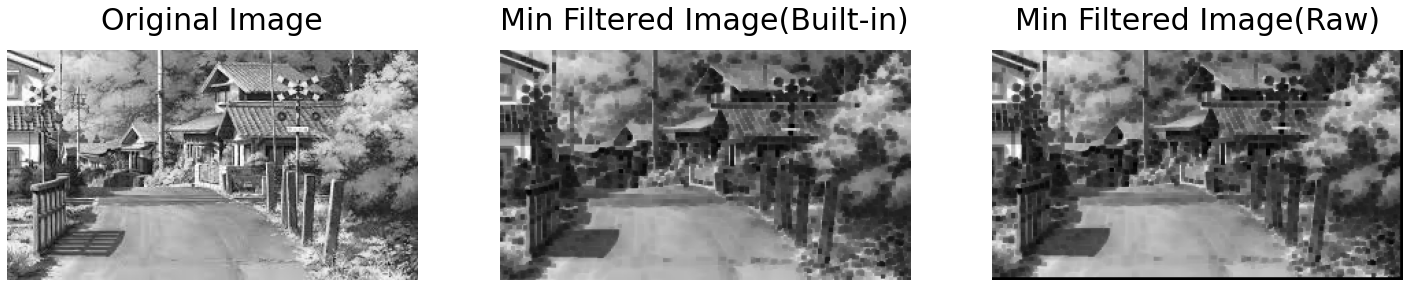

In [ ]:
kSize = 3    # Mask size
bSize = kSize // 2 
imageO = np.zeros(image.shape, dtype=np.uint8)
for x in range(image.shape[0] - kSize + 1):
    for y in range(image.shape[1] - kSize + 1):
        imageO[x, y] = np.amin(image[x:x+kSize, y:y+kSize])

f=plt.figure(figsize=(25,8))
f.add_subplot(1,3,1)
plt.title('Original Image', fontsize=30, color='black', pad=20)
plt.imshow(im1,cmap='gray')
plt.axis('off')
f.add_subplot(1,3,2)
plt.title('Min Filtered Image(Built-in)', fontsize=30, color='black', pad=20)
plt.imshow(im2,cmap='gray')
plt.axis('off')
f.add_subplot(1,3,3)
plt.title('Min Filtered Image(Raw)', fontsize=30, color='black', pad=20)
plt.imshow(imageO,cmap='gray')
plt.axis('off')
plt.show(block=True)

# 5. Midpoint filtering

# Built-in

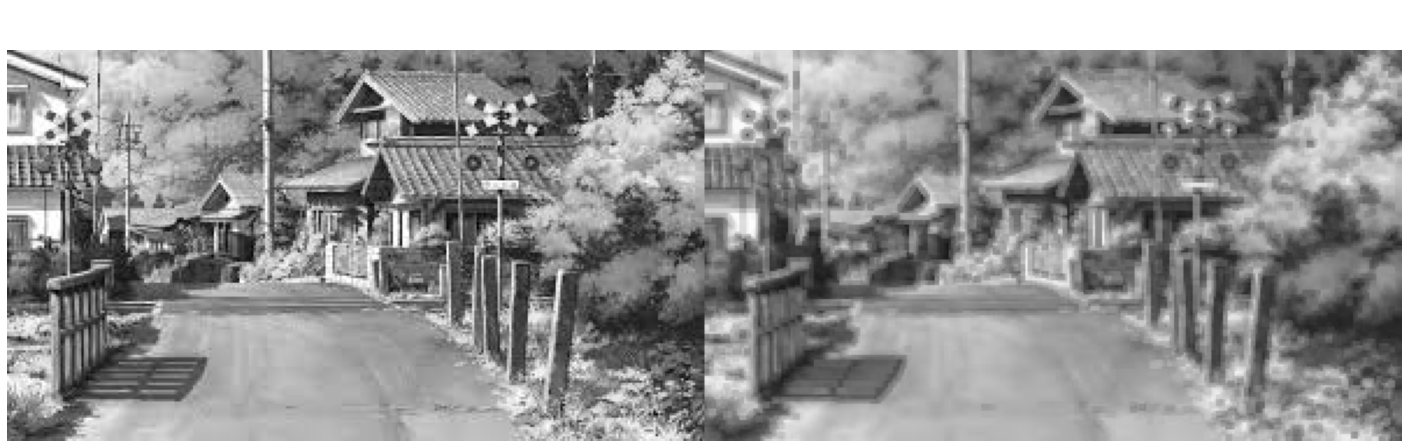

In [ ]:
from scipy.ndimage import maximum_filter, minimum_filter

maxf = maximum_filter(image, (3, 3))
minf = minimum_filter(image, (3, 3))
maxf = maxf.astype(int)
minf = minf.astype(int)
midpoint = (maxf + minf) / 2

res = np.hstack([image, midpoint])
f=plt.figure(figsize=(25,8))
plt.title('Original Image vs Midpoint Filtered Image (Built-in)', fontsize=30, color='white', pad=20)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show(block=True)

# Raw

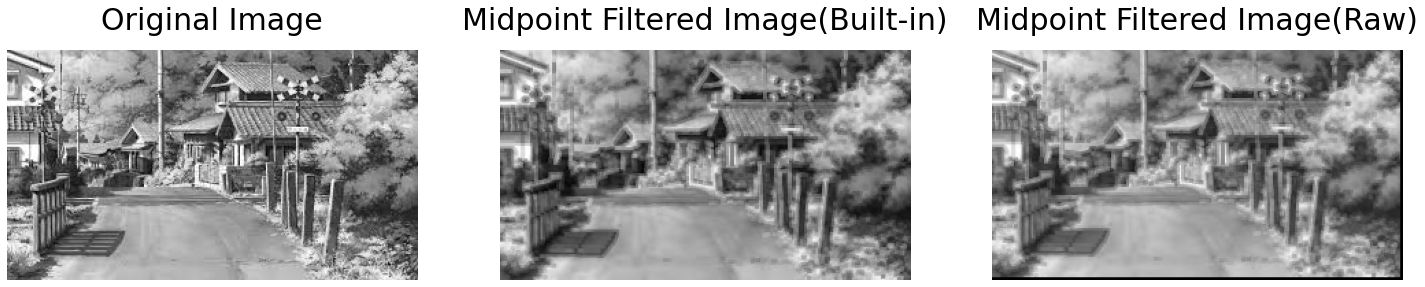

In [ ]:
kSize = 3    # Mask size
bSize = kSize // 2 
imageO = np.zeros(image.shape, dtype=np.uint8)
for x in range(image.shape[0] - kSize + 1):
    for y in range(image.shape[1] - kSize + 1):
        mx = np.amax(image[x:x+kSize, y:y+kSize])
        mn = np.amin(image[x:x+kSize, y:y+kSize])
        imageO[x, y] = (int(mx) + int(mn)) / 2
f=plt.figure(figsize=(25,8))
f.add_subplot(1,3,1)
plt.title('Original Image', fontsize=30, color='black', pad=20)
plt.imshow(image,cmap='gray')
plt.axis('off')
f.add_subplot(1,3,2)
plt.title('Midpoint Filtered Image(Built-in)', fontsize=30, color='black', pad=20)
plt.imshow(midpoint,cmap='gray')
plt.axis('off')
f.add_subplot(1,3,3)
plt.title('Midpoint Filtered Image(Raw)', fontsize=30, color='black', pad=20)
plt.imshow(imageO,cmap='gray')
plt.axis('off')
plt.show(block=True)